# Importing All Useful Modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

Using TensorFlow backend.


# Let's Load Dataset And Do Some EDA And Data Cleaning

In [3]:
df=pd.read_csv('https://github.com/AsheshJain/Stock-Prediction-Project-Files/blob/cdf73e729bad36c1ed5059649a6ece7c1111d2d1/Data%20Sets/ASIANPAINT.csv?raw=true')
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
2000-01-04,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2000-01-05,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
2000-01-06,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
2000-01-07,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


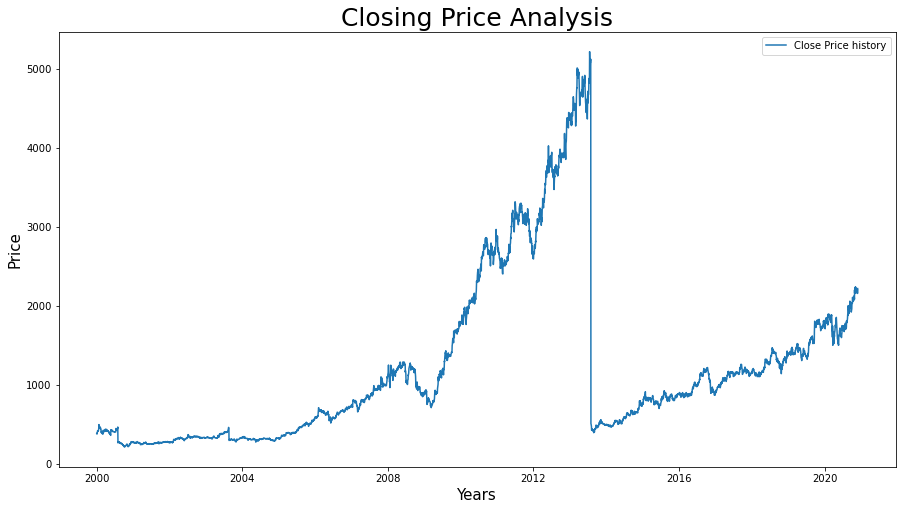

In [6]:
plt.figure(figsize=(15,8))
plt.title("Closing Price Analysis",fontsize=25)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.plot(df["Close"],label='Close Price history')
plt.legend()
plt.show()

In [24]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
    

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
new_dataset.count()

Close    5204
dtype: int64

### Splitting Data into Training And Validation DataSet

In [41]:
final_dataset=new_dataset.values

train_data=final_dataset[0:3500,:]
valid_data=final_dataset[3500:,:]
len(train_data),len(valid_data)

# Scaling The Values in range(0,1) as per as out Model Requirement

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

print(scaled_data)

x_train_data,y_train_data=[],[]

# Here we are taking Time-Stamp as 60 days and them making the x_train and y_train data

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

# Here we are making the input x_train in 3 dimension to fit it into out LSTM Model

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

len(x_train_data)


[[0.03416394]
 [0.03494358]
 [0.03443382]
 ...
 [0.38852739]
 [0.3887273 ]
 [0.40072166]]


3440

# Model Building , Testing And Saving The Model

In [44]:
# Stack LSTM Model

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50,return_sequences=True))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Training The Model
lstm_model.fit(x_train_data,y_train_data,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3440/3440 [==============================] - 31s 9ms/step - loss: 0.0016
Epoch 2/100
3440/3440 [==============================] - 32s 9ms/step - loss: 0.0017
Epoch 3/100
3440/3440 [==============================] - 38s 11ms/step - loss: 0.0014
Epoch 4/100
3440/3440 [==============================] - 37s 11ms/step - loss: 0.0013
Epoch 5/100
3440/3440 [==============================] - 34s 10ms/step - loss: 0.0011
Epoch 6/100
3440/3440 [==============================] - 36s 11ms/step - loss: 0.0010
Epoch 7/100
3440/3440 [==============================] - 33s 10ms/step - loss: 8.3092e-04
Epoch 8/100
3440/3440 [==============================] - 32s 9ms/step - loss: 8.6016e-04
Epoch 9/100
3440/3440 [==============================] - 34s 10ms/step - loss: 8.2455e-04
Epoch 10/100
3440/3440 [==============================] - 51s 15ms/step - loss: 6.8883e-04
Epoch 11/100
3440/3440 [==============================] - 45s 13ms/step - loss: 6.9924e-04
Epoch 12/100
3440/3440 [===========

### Testing The Model

In [69]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)
len(closing_price)

1704

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


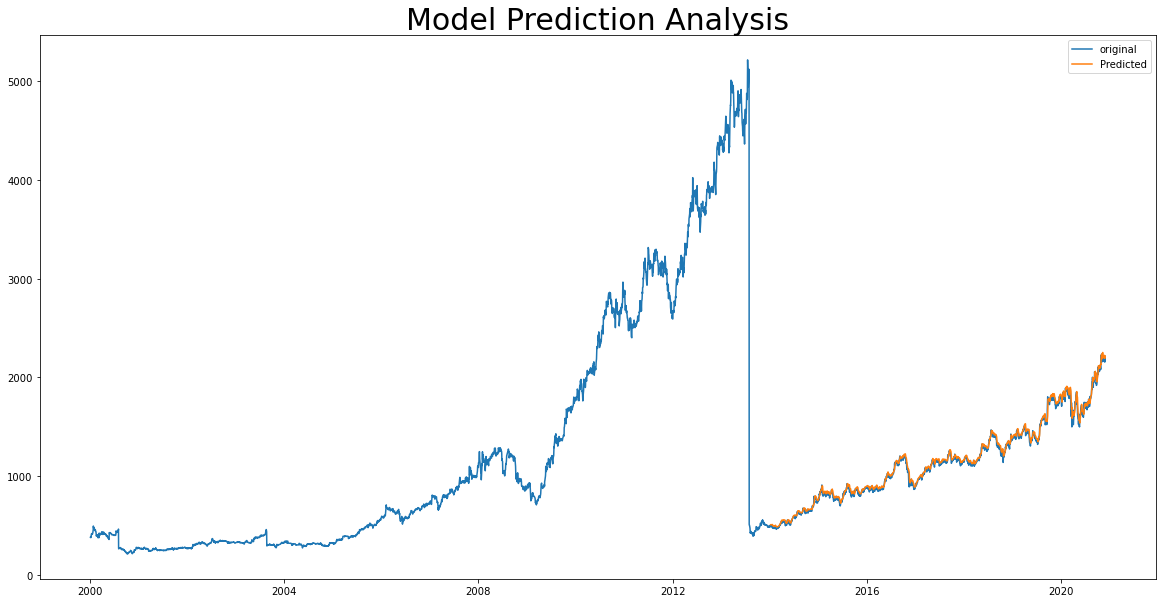

In [70]:
train_data=new_dataset[:3500]
valid_data=new_dataset[3500:]
valid_data['Predictions']=closing_price
plt.title("Model Prediction Analysis",fontsize=30)
plt.plot(new_dataset["Close"],label='original')
plt.plot(valid_data["Predictions"],label='Predicted')
plt.legend()
plt.show()

## Saving The Model For Further Use

In [71]:
lstm_model.save("saved_lstm_model.h5")